In [1]:
import soditools.soditools as u
import pandas as pd
import numpy as np

In [2]:
country_id = 'MX'

plp_file = f'UPSELL_{country_id}.csv'
plp_bucket = f'bucket_recommender_{country_id.lower()}'
plp_path = f'gs://{plp_bucket}/'

sandbox_file = f'UPSELL_{country_id}.csv'
sandbox_bucket = f'bucket_recommender_sandbox_{country_id.lower()}'
sandbox_path = f'gs://{sandbox_bucket}/'

In [3]:
# df = pd.read_csv(_path+_file)
df_plp = pd.read_csv(plp_path+plp_file)

In [ ]:
df_plp.head()

,productId,upsell_a_pro,upsell_a_hogar,upsell_a_sin_segmento,upsell_b_pro,upsell_b_hogar,upsell_b_sin_segmento
0,249122,249599|228370|248169|294802|22863X|131024|1317...,249599|228370|248169|294802|22863X|131024|1317...,249599|228370|248169|294802|22863X|131024|1317...,248460|634611|294993|248304|634832|295035|1312...,295035|248460|294993|131288|29554X|295833|2950...,248460|634611|294993|248304|634832|295035|2948...
1,557331,295957|295566|295388|295078|295191|634972|2958...,295957|295566|295388|295078|295191|634972|2958...,295957|295566|295388|295078|295191|634972|2958...,557188|295388|295566|295124|295477|295078|6346...,557188|295124|295078|29585X|295388|295191|2955...,557188|295388|295566|295477|295124|295531|6349...
2,370991,370924|370800|371114|370916|212482|212563|3707...,370924|370800|371114|370916|212482|212563|3707...,370924|370800|371114|370916|212482|212563|3707...,370819|370894|370916|370932|370800|370827|3708...,370819|370894|371114|370932|370800|370843|3710...,370819|370894|370932|370843|37105X|21261X|3708...
3,883671X,8836892|8836698|8837481|8836906|8836973|118311...,8836892|8836698|8837481|8836906|8836973|118311...,8836892|8836698|8837481|8836906|8836973|118311...,437441|8836892|8836698|8836973|82870X|828084|8...,437441|8836698|8836892|8836973|8836965|82870X|...,437441|8836698|8836892|8836973|82870X|118311|8...
4,261351,112925|552682|261416|261327|80486X|804738|2613...,112925|552682|261416|261327|80486X|804738|2613...,112925|552682|261416|261327|80486X|804738|2613...,112925|112844|536113|8772754|552682|8772614|26...,112925|112844|536113|8772614|8772754|552682|26...,112925|536113|8772614|112844|8772754|552682|26...


In [5]:
df_sandbox = pd.read_csv(sandbox_path+sandbox_file)

In [6]:
df_sandbox.head()

,productId,upsell_a_pro,upsell_a_hogar,upsell_a_sin_segmento,upsell_b_pro,upsell_b_hogar,upsell_b_sin_segmento
0,437417,10924X|117552|118036|437174|43745X|109258|4371...,10924X|117552|118036|437174|43745X|109258|4371...,10924X|117552|118036|437174|43745X|109258|4371...,828122|437166|118001|437158|118133|755702|4371...,828122|118001|109258|437166|10924X|619787|6196...,828122|118001|109258|437166|10924X|619787|4373...
1,167894,167886|167827|167851|167878|167835|167819|1677...,167886|167827|167851|167878|167835|167819|1677...,167886|167827|167851|167878|167835|167819|1677...,167819|167843|167851|448664|167827|167878|1678...,167819|167843|448664|167827|167878|16786X|1678...,167819|167878|167843|448664|167827|16786X|1678...
2,8992851,8992843|448664|8992746|8781079|8992754|899286X...,8992843|448664|8992746|8781079|8992754|899286X...,8992843|448664|8992746|8781079|8992754|899286X...,8992843|8992835|448664|8992746|8781079|8992754...,8992843|8992835|448664|8992746|8781079|8992754...,8992843|8992835|448664|8992746|8781079|8992754...
3,718688,738581|74395X|261424|738689|261440|738891|7388...,738581|74395X|261424|738689|261440|738891|7388...,738581|74395X|261424|738689|261440|738891|7388...,536288|536237|261440|8772363|548308|738891|739...,261440|536288|536296|739758|8772649|738689|536...,261440|536288|739758|11300X|536237|536148|1130...
4,230936,231517|230952|231703|230804|231371|231355|2308...,231517|230952|231703|230804|231371|231355|2308...,231517|230952|231703|230804|231371|231355|2308...,231517|230952|231703|230804|231371|231355|2308...,231517|230952|231703|230804|231371|231355|2308...,231517|230952|231703|230804|231371|231355|2308...


In [7]:
df_plp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52669 entries, 0 to 52668
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   productId              52669 non-null  object
 1   upsell_a_pro           48561 non-null  object
 2   upsell_a_hogar         48561 non-null  object
 3   upsell_a_sin_segmento  48561 non-null  object
 4   upsell_b_pro           52669 non-null  object
 5   upsell_b_hogar         52669 non-null  object
 6   upsell_b_sin_segmento  52669 non-null  object
dtypes: object(7)
memory usage: 2.8+ MB


In [8]:
df_sandbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52667 entries, 0 to 52666
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   productId              52667 non-null  object
 1   upsell_a_pro           48559 non-null  object
 2   upsell_a_hogar         48559 non-null  object
 3   upsell_a_sin_segmento  48559 non-null  object
 4   upsell_b_pro           52667 non-null  object
 5   upsell_b_hogar         52667 non-null  object
 6   upsell_b_sin_segmento  52667 non-null  object
dtypes: object(7)
memory usage: 2.8+ MB


In [9]:
_cols = ['productId','upsell_b_sin_segmento','upsell_b_pro','upsell_b_hogar']
df = pd.merge(left=df_plp[_cols], right=df_sandbox[_cols], how='outer', on='productId', suffixes=['_plp','_sandbox'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52669 entries, 0 to 52668
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   productId                      52669 non-null  object
 1   upsell_b_sin_segmento_plp      52669 non-null  object
 2   upsell_b_pro_plp               52669 non-null  object
 3   upsell_b_hogar_plp             52669 non-null  object
 4   upsell_b_sin_segmento_sandbox  52667 non-null  object
 5   upsell_b_pro_sandbox           52667 non-null  object
 6   upsell_b_hogar_sandbox         52667 non-null  object
dtypes: object(7)
memory usage: 2.8+ MB


In [11]:
df.head()

,productId,upsell_b_sin_segmento_plp,upsell_b_pro_plp,upsell_b_hogar_plp,upsell_b_sin_segmento_sandbox,upsell_b_pro_sandbox,upsell_b_hogar_sandbox
0,249122,248460|634611|294993|248304|634832|295035|2948...,248460|634611|294993|248304|634832|295035|1312...,295035|248460|294993|131288|29554X|295833|2950...,248460|634611|294993|248304|634832|295035|2948...,248460|634611|294993|248304|634832|295035|1312...,295035|248460|294993|131288|29554X|295833|2950...
1,557331,557188|295388|295566|295477|295124|295531|6349...,557188|295388|295566|295124|295477|295078|6346...,557188|295124|295078|29585X|295388|295191|2955...,557188|295388|295566|295477|295124|295531|6349...,557188|295388|295566|295124|295477|295078|6346...,557188|295124|295078|29585X|295388|295191|2955...
2,370991,370819|370894|370932|370843|37105X|21261X|3708...,370819|370894|370916|370932|370800|370827|3708...,370819|370894|371114|370932|370800|370843|3710...,370819|370894|370932|370843|37105X|21261X|3708...,370819|370894|370916|370932|370800|370827|3708...,370819|370894|371114|370932|370800|370843|3710...
3,883671X,437441|8836698|8836892|8836973|82870X|118311|8...,437441|8836892|8836698|8836973|82870X|828084|8...,437441|8836698|8836892|8836973|8836965|82870X|...,437441|8836698|8836892|8836973|82870X|118311|8...,437441|8836892|8836698|8836973|82870X|828084|8...,437441|8836698|8836892|8836973|8836965|82870X|...
4,261351,112925|536113|8772614|112844|8772754|552682|26...,112925|112844|536113|8772754|552682|8772614|26...,112925|112844|536113|8772614|8772754|552682|26...,112925|536113|8772614|112844|8772754|552682|26...,112925|112844|536113|8772754|552682|8772614|26...,112925|112844|536113|8772614|8772754|552682|26...


In [12]:
df.describe()

,productId,upsell_b_sin_segmento_plp,upsell_b_pro_plp,upsell_b_hogar_plp,upsell_b_sin_segmento_sandbox,upsell_b_pro_sandbox,upsell_b_hogar_sandbox
count,52669,52669,52669,52669,52667,52667,52667
unique,52669,52060,52104,52061,52143,52143,52143
top,249122,243280|235865|293555|243280|235350|235121|2349...,243280|235865|293555|243280|235350|235121|2349...,243280|235865|293555|243280|235350|235121|2349...,243280|235865|293555|243280|235350|235121|2349...,243280|235865|293555|243280|235350|235121|2349...,243280|235865|293555|243280|235350|235121|2349...
freq,1,54,54,54,54,54,54


In [13]:
from typing import Tuple

def compare_lists(str_list1: str, str_list2: str, separator: str = "|") -> Tuple[float, float, float]:
    """
    Compara dos listas representadas como strings usando múltiples métricas:
    - Jaccard Similarity
    - Sorensen-Dice Coefficient
    - Overlap Coefficient
    
    :param str_list1: Primer string de elementos separados por el delimitador.
    :param str_list2: Segundo string de elementos separados por el delimitador.
    :param separator: Caracter que separa los elementos en los strings (por defecto "|").
    :return: (Jaccard, Dice, Overlap)
    """
    if not isinstance(str_list1, str):
        str_list1 = str(str_list1) if str_list1 is not None else ""

    if not isinstance(str_list2, str):
        str_list2 = str(str_list2) if str_list2 is not None else ""

    if not str_list1 or not str_list2:
        return (0.0, 0.0, 0.0)

    set1 = set(str_list1.split(separator))
    set2 = set(str_list2.split(separator))

    intersection = len(set1 & set2)
    union = len(set1 | set2)
    min_size = min(len(set1), len(set2))

    jaccard = intersection / union if union != 0 else 0.0
    dice = (2 * intersection) / (len(set1) + len(set2)) if (len(set1) + len(set2)) != 0 else 0.0
    overlap = intersection / min_size if min_size != 0 else 0.0

    return (jaccard, dice, overlap)

In [14]:
df.columns

Index(['productId', 'upsell_b_sin_segmento_plp', 'upsell_b_pro_plp',
       'upsell_b_hogar_plp', 'upsell_b_sin_segmento_sandbox',
       'upsell_b_pro_sandbox', 'upsell_b_hogar_sandbox'],
      dtype='object')

In [15]:
df['sim_b_sin_segmento'] = df[['upsell_b_sin_segmento_plp','upsell_b_sin_segmento_sandbox']].apply(lambda x: compare_lists(x[0],x[1])[1], axis=1)
df['sim_b_pro'] = df[['upsell_b_pro_plp','upsell_b_pro_sandbox']].apply(lambda x: compare_lists(x[0],x[1])[1], axis=1)
df['sim_b_hogar'] = df[['upsell_b_hogar_plp','upsell_b_hogar_sandbox']].apply(lambda x: compare_lists(x[0],x[1])[1], axis=1)

In [16]:
df.head(10)

,productId,upsell_b_sin_segmento_plp,upsell_b_pro_plp,upsell_b_hogar_plp,upsell_b_sin_segmento_sandbox,upsell_b_pro_sandbox,upsell_b_hogar_sandbox,sim_b_sin_segmento,sim_b_pro,sim_b_hogar
0,249122,248460|634611|294993|248304|634832|295035|2948...,248460|634611|294993|248304|634832|295035|1312...,295035|248460|294993|131288|29554X|295833|2950...,248460|634611|294993|248304|634832|295035|2948...,248460|634611|294993|248304|634832|295035|1312...,295035|248460|294993|131288|29554X|295833|2950...,1.00,1.00,1.00
1,557331,557188|295388|295566|295477|295124|295531|6349...,557188|295388|295566|295124|295477|295078|6346...,557188|295124|295078|29585X|295388|295191|2955...,557188|295388|295566|295477|295124|295531|6349...,557188|295388|295566|295124|295477|295078|6346...,557188|295124|295078|29585X|295388|295191|2955...,0.90,0.90,0.90
2,370991,370819|370894|370932|370843|37105X|21261X|3708...,370819|370894|370916|370932|370800|370827|3708...,370819|370894|371114|370932|370800|370843|3710...,370819|370894|370932|370843|37105X|21261X|3708...,370819|370894|370916|370932|370800|370827|3708...,370819|370894|371114|370932|370800|370843|3710...,0.80,0.80,0.80
3,883671X,437441|8836698|8836892|8836973|82870X|118311|8...,437441|8836892|8836698|8836973|82870X|828084|8...,437441|8836698|8836892|8836973|8836965|82870X|...,437441|8836698|8836892|8836973|82870X|118311|8...,437441|8836892|8836698|8836973|82870X|828084|8...,437441|8836698|8836892|8836973|8836965|82870X|...,1.00,1.00,1.00
4,261351,112925|536113|8772614|112844|8772754|552682|26...,112925|112844|536113|8772754|552682|8772614|26...,112925|112844|536113|8772614|8772754|552682|26...,112925|536113|8772614|112844|8772754|552682|26...,112925|112844|536113|8772754|552682|8772614|26...,112925|112844|536113|8772614|8772754|552682|26...,0.45,0.45,0.45
5,231576,230804|231444|231614|231703|231304|230685|2315...,230804|230685|231460|231177|23091X|231517|2315...,230804|231444|231614|231584|231304|231568|2316...,230804|231444|231614|231703|231304|230685|2315...,230804|230685|231460|231177|23091X|231517|2315...,230804|231444|231614|231584|231304|231568|2316...,1.00,0.95,1.00
6,432660,589357|430390|430137|589438|589276|589381|4327...,589357|430390|430137|589438|753874|589381|4939...,589357|430390|431915|430528|432466|430137|5894...,589357|430390|430137|589438|589276|589381|4327...,589357|430390|430137|589438|753874|589381|4939...,589357|430390|431915|430528|432466|430137|5894...,1.00,1.00,1.00
7,8749140,61453X|613592|614084|8752680|8751102|353914|90...,61453X|613592|614084|8752680|8751102|353914|90...,61453X|613592|614084|8752680|8751102|353914|90...,613592|61453X|9021205|8972508|902462X|9023372|...,613592|61453X|9021205|8972508|902462X|9023372|...,613592|61453X|9021205|8972508|902462X|9023372|...,0.90,0.90,0.90
8,9021876,613371|9024328|9024557|9024336|9026851|9022791...,613371|9024328|9024336|9024298|9022791|9026851...,613371|9024328|9024298|9024336|9026851|9022791...,613371|9024328|9024557|9024336|9026851|9022791...,613371|9024328|9024336|9024298|9022791|9026851...,613371|9024328|9024298|9024336|9026851|9022791...,1.00,1.00,1.00
9,61016X,168319|610232|8969450|8734046|538515|537179|16...,168319|537179|610232|16836X|8734046|538515|168...,168319|610232|537179|8969450|8734046|538515|16...,168319|610232|8969450|8734046|538515|537179|16...,168319|537179|610232|16836X|8734046|538515|168...,168319|610232|537179|8969450|8734046|538515|16...,0.90,0.90,0.90


In [17]:
df[['sim_b_sin_segmento','sim_b_pro','sim_b_hogar']].describe()

,sim_b_sin_segmento,sim_b_pro,sim_b_hogar
count,52669.000000,52669.000000,52669.000000
mean,0.877907,0.876033,0.878054
std,0.164229,0.164914,0.164468
min,0.000000,0.000000,0.000000
25%,0.800000,0.800000,0.800000
50%,0.950000,0.947368,0.950000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


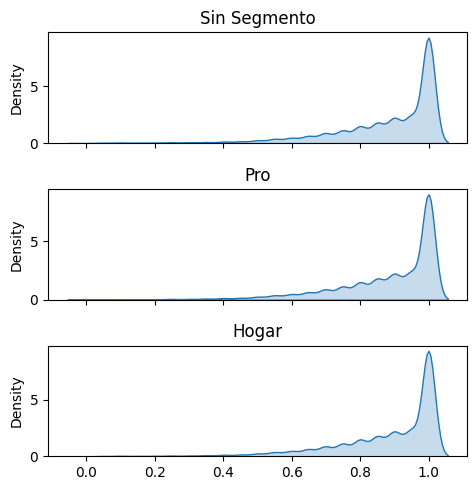

In [18]:
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(3,1,figsize=(5,5), sharex=True)
ax = ax.flat

sns.kdeplot(df['sim_b_sin_segmento'], fill=True, ax=ax[0])
ax[0].set_title('Sin Segmento')
ax[0].set_xlabel(None)
sns.kdeplot(df['sim_b_pro'], fill=True, ax=ax[1])
ax[1].set_title('Pro')
ax[1].set_xlabel(None)
sns.kdeplot(df['sim_b_hogar'], fill=True, ax=ax[2])
ax[2].set_title('Hogar')
ax[2].set_xlabel(None)


plt.tight_layout()

In [19]:
_threshold = .5
np.divide(df[df['sim_b_sin_segmento'] >= _threshold].shape[0], df.shape[0])

0.9673052459701152